# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#read csv data into pandas dataframe
df = pd.read_csv('data/human_body_temperature.csv')

print(df.head())
print(df.shape)

#check for any null values
df.isnull().values.any()

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
(130, 3)


False

1.  In the histogram below we can see that the distribution of body temperatures is normal as it follows the bell shape of a normal distribution.  The graph below show the comparison of the theoretical CDF and ECDF which fall along the same curve and show a normal distribution. 

2. The sample size would be considered large as n = 130 and is n >= 30 different temperatures taken and each observation is independent from another as taking one persons temperature does not affect another person's result. 

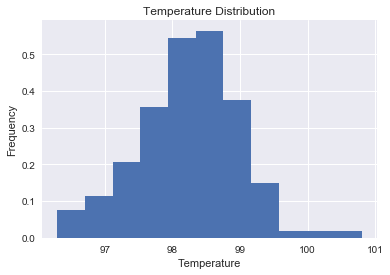

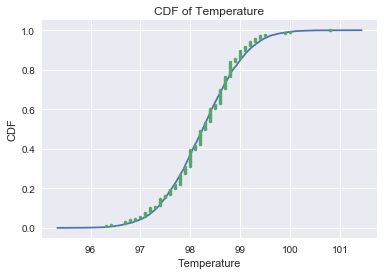

In [25]:
#put temp column into an array
n_temp = np.array(df['temperature'])

#calculate bins
n_data = len(n_temp)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

#set default seaborn set
sns.set()

#plot histogram to test if temp is normally distributed
_ = plt.hist(n_temp, n_bins, density=True)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Frequency')
_ = plt.title('Temperature Distribution')
plt.show()

#ECDF function for normal distribution comparison
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

#calculate mean and standard deviation of sample temperature data
mu = n_temp.mean()
sigma = n_temp.std()

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

x_theor, y_theor = ecdf(samples)
x, y = ecdf(n_temp)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Temperature')
plt.show()



3. Is the true population mean really 98.6 degrees F? 

Null Hypothesis:  The true mean is equal to 98.6 degrees
Alternative Hypothesis : The true mean is not equal to 98.6 degrees

First, we try a bootstrap hypothesis test as seen below.

Assuming the hypothesis test is true we shift the sample data (n_temp) so that the mean is 98.6.  We then take 10,000 bootstrap replicates of the shifted sample data (translated_n_temp).  The test statistic is the mean of the bootstrap sample calculated to be 98.2 minus Wunderlich's value of 98.6.  Below this was calculated to be -0.35 (diff_obs). The p-value is then calculated by finding the reported fraction of bootstrap replicates that are less than the observed test statistic. We are using less than because the mean from the sample data is less than 98.6 (p).  The p-value was calculated to be 0.0 this suggests that there is a fundamental difference between the mean from the sample data and Wunderlich's value of 98.6 and enough to reject the null hypothesis. 

We can see from the histogram of the bootstrap hypothesis test that the mean temperature falls between 98.2 and 98.3 degrees so it is not the equal to 98.6 degrees.

Diff observed =  -0.35076923076924515
p-value  0.0
mean of sample data  98.24923076923075


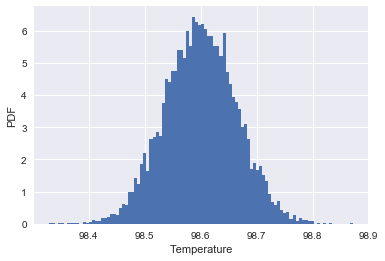

In [3]:
#Functions:
#function to resample the data
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 

#function to create bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] =bootstrap_replicate_1d(data,func)
    return bs_replicates

#assuming the null hypothesis is true we shift the sample data so that the mean is 98.6
translated_n_temp = n_temp - np.mean(n_temp) + 98.6

#calculate the test statistic, the observed difference between the sample mean and Wunderlich's value of 98.6
diff_obs = mu - 98.6

print("Diff observed = ", diff_obs)

#take 10,000 bootstrap replicates of the translated temperatures
bs_replicates = draw_bs_reps(translated_n_temp, np.mean, size=10000)

# Compute and print standard deviation of bootstrap replicates
#bs_std = np.std(bs_replicates)
#print("Standard deviation of bootstrap replicates: ", bs_std)

#calculate the p-value
p = np.sum(bs_replicates <= diff_obs) / 10000
print("p-value ", p)

#mean value of sample data (n_temp)
print("mean of sample data ", mu)

#compute number of bins for histogram
bs_data = len(bs_replicates)
bs_bins = np.sqrt(bs_data)
bs_bins = int(bs_bins)

# Make a histogram of the results
_ = plt.hist(bs_replicates,bins=bs_bins,density=True)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

3. continued
Now, let's try frequentist statistical testing. 

Would you use a one-sample or two-sample test? Why? 
In this situation, is it appropriate to use the t or z statistic? 
Now try using the other test. How is the result be different? Why? 

Using frequentist statistics, I used a two tailed test since we would like to know if the means are significantly different, significantly greater than 98.6 degrees or significantly less than 98.6 degrees.

The Z-test requires the population standard deviation which is unknown but we have already calculated the sample standard deviation above (sigma) so we can use a t-test since a t-test only requires sample standard deviation.  The tscore is calculated to be -5.45 (t_score) with a p-value of 0.0 (pvalue) which is the same as what we calculated for the bootstrap hypothesis test above.  This p-value is statistically significant enough to reject the null hypothesis. 

In [4]:
#print sample standard deviation
print("Sample standard deviation ", sigma)

#calculate t-score 
t_stat = stats.ttest_1samp(n_temp, 98.6)

t_score = t_stat.statistic
print("t-score {}" .format(round(t_score, 2)))

#calculate p-value
pvalue = t_stat.pvalue
print("p-value {}" .format(round(pvalue, 2)))

Sample standard deviation  0.730357778905038
t-score -5.45
p-value 0.0


4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

    Which one is the correct one to use? 
    
    As above we can only use the t-test as the standard deviation for the population is unknown but we do have the sample           standard deviation.
    
    What do you notice? 
    In this test the p-value is at 0.06 which is greater than 0.05 so these results are not significant enough to reject the         null hypothesis.
    
    What does this tell you about the difference in application of the t and z statistic? 
    Unable to calcualte z statistic. 

In [5]:
#grab ten random choices from the sample temperatures
tenSample = np.random.choice(n_temp, size=10)

#calculate t-score and p value
tenSample_stat = stats.ttest_1samp(tenSample, 98.6)

#grab the t-score and p-value from t-test and print
tenSample_t = tenSample_stat.statistic
print("t-score {}" .format(round(tenSample_t, 2)))

tenSample_p = tenSample_stat.pvalue
print("pvalue {:0.2}" .format(round(tenSample_p, 2)))


t-score -0.31
pvalue 0.76


5. At what temperature should we consider someone's temperature to be "abnormal"? 

Using the bootstrap approach at a 95% confidence interval an abnormal temperature would be a temperature that is less than 98.12 degrees and greater than 98.38 degrees.

Using the frequentist approach at a 95% confidence interval an abnormal temperature would be a temperature that is less than 96.29 and greater than 100.21 degrees.

In [12]:
print("Bootstrap approach\n")

#create bootstrap replicates
bs_replicates1 = draw_bs_reps(n_temp, np.mean, size=10000)

#calculate p-value of replicates
pten = np.sum(bs_replicates1 >= 98.6) / len(bs_replicates1)
print("p-value of ten random choices ", pten)

#calculate mean of replicates
xbar = np.mean(bs_replicates1)

#calculate 95% confidence interval
conf_int = np.percentile(bs_replicates1,[2.5,97.5])
print("We can be 95% confident that the mean will fall between " , round(conf_int[0],2)," and ", round(conf_int[1],2))

#calculate standard deviation
bs1_std = np.std(bs_replicates1)

x_bar = np.mean(bs_replicates1)
ciB = stats.norm.interval(0.95, loc=xbar, scale=1)

#calculate margin of error
c1 = ciB[0] - xbar
c2 = ciB[1] - xbar

print("Margin of Error ", round(c1,2), round(c2,2))

#Frequentist approach
print("\n")
print("Frequentist approach\n")

#calclate the confidence interval
ciF_low, ciF_high = stats.norm.interval(0.95, loc=xbar, scale=1)
print("Confidence interval ", round(ciF_low, 2), round(ciF_high,2))

#calculate margin of error
c3 = ciF_low - xbar
c4 = ciF_high - xbar

print("Margin of Error ", round(c3,2), round(c4,2))


Bootstrap approach

p-value of ten random choices  0.0
We can be 95% confident that the mean will fall between  98.13  and  98.38
Margin of Error  -1.96 1.96


Frequentist approach

Confidence interval  96.29 100.21
Margin of Error  -1.96 1.96


6. Is there a significant difference between males and females in normal temperature? 
   
   Null Hypothesis : male normal temp is equal to female normal temp
   Alternative Hypothesis: male normal temp is not equal to female normal temp
   
   I used a two sample bootstrap test.  We can see from the CDF that both male and femal temperatures are normally distributed  
   and the sample sizes are large enough that it passes the requirements of the central limit theorem. Number of males was 65      and number of females was also 65.  
   
   The test statistic was the observed difference of the mean from the males array and the mean from the females array.            Assuming the null hypothesis is true the mean temperature of both males and females was shifted so that both of their means    are equal.  I then took replicates of each shifted array of size 10,000.  The P-value was then calculated to be 0.011. 0.011    is less than the alpha value of 0.05 so we must reject the null hypothesis.        

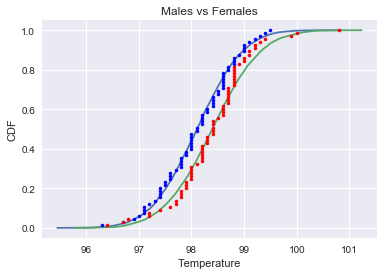

p-value = 0.0106


In [26]:
#separate male and female temps
males = np.array(df.temperature[df.gender == 'M'])
females = np.array(df.temperature[df.gender == 'F'])

#calulate the means and standard deviation of the male sample and the female sample
males_mean = np.mean(males)
males_std = males.std()

females_mean = np.mean(females)
females_std = females.std()

#check if each array is normally distributed
# Sample out of a normal distribution with this mu and sigma: samples
male_samples = np.random.normal(males_mean, males_std, size=10000)
female_samples = np.random.normal(females_mean, females_std, size=10000)

xm_theor, ym_theor = ecdf(male_samples)
x_m, y_m = ecdf(males)

xf_theor, yf_theor = ecdf(female_samples)
x_f, y_f = ecdf(females)

# Plot the CDFs and show the plot
_ = plt.plot(xm_theor, ym_theor)
_ = plt.plot(xf_theor, yf_theor)
_ = plt.plot(x_m, y_m, marker='.', linestyle='none', color = 'blue')
_ = plt.plot(x_f, y_f, marker = '.', linestyle='none', color = 'red')
_ = plt.margins = 0.02
_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')
_ = plt.title('Males vs Females')
plt.show()

#assuming the null hypothesis is true we shift both males and females arrays so that their means are equal
males_temp_shifted = males - np.mean(males) + mu
females_temp_shifted = females - np.mean(females) + mu

#compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_males = draw_bs_reps(males_temp_shifted, np.mean, 10000)
bs_replicates_females = draw_bs_reps(females_temp_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_males - bs_replicates_females
#get observed difference of means
empirical_diff_means = males_mean - females_mean

# Compute and print p-value: p
p = np.sum(bs_replicates <= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)
